In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from netCDF4 import num2date,date2num,Dataset
import matplotlib.gridspec as gridspec
import corner
%matplotlib inline

In [23]:
import pymc

In [26]:
from marcus_py_tools import make_edge_vec

ModuleNotFoundError: No module named 'marcus_py_tools'

In [27]:
#:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
def make_edge_vec(center_vec):
    edge_vec = np.zeros(len(center_vec)+1)
    edge_vec[0] = center_vec[0] - .5*(center_vec[1]-center_vec[0])
    edge_vec[len(center_vec)] = center_vec[-1] + .5*(center_vec[-1]-center_vec[-2])
    for i in range(1,len(center_vec)):
        edge_vec[i] = .5*(center_vec[i]+center_vec[i-1])
    return edge_vec

In [22]:
cov_all  = np.array([[108.7,  105.16, 126.17],
                     [105.16, 131.2,  173.56],
                     [126.17, 173.56, 264.75]])
mean_all = np.array([35.34, 32.34, 37.80])
#..
cov_dis  = np.array([[126.8,  180.82, 159.24],
                     [180.82, 286.7,  278.17],
                     [159.24, 278.17, 426.9 ]])
mean_dis = np.array([2.44, -4.34, 4.03])
#..
cov_bin  = np.array([[101.2,  96.55,  121.96],
                     [96.55,  121.1,  168.97],
                     [121.96, 168.97, 259.0 ]])
mean_bin = np.array([35.56, 32.34, 37.80])
#..

In [28]:
nc =  Dataset('/home/mvanlier/BOSS/BOSS_misc/M0_M3_all.nc','r')
h_M0_M3 = nc.variables['M0_M3'][:,:]
nc.close()
nc =  Dataset('/home/mvanlier/BOSS/BOSS_misc/M0_M6_all.nc','r')
h_M0_M6 = nc.variables['M0_M6'][:,:]
nc.close()
nc =  Dataset('/home/mvanlier/BOSS/BOSS_misc/M3_M6_all.nc','r')
h_M3_M6 = nc.variables['M3_M6'][:,:]
nc.close()
nc =  Dataset('/home/mvanlier/BOSS/BOSS_misc/MBINS_all.nc','r')
mbins = nc.variables['MBINS'][:]
nc.close()
mbine = make_edge_vec(mbins)
#.......
h_M0_M3 = np.ma.masked_where(h_M0_M3==0.,h_M0_M3)
h_M0_M6 = np.ma.masked_where(h_M0_M6==0.,h_M0_M6)
h_M3_M6 = np.ma.masked_where(h_M3_M6==0.,h_M3_M6)
#.......

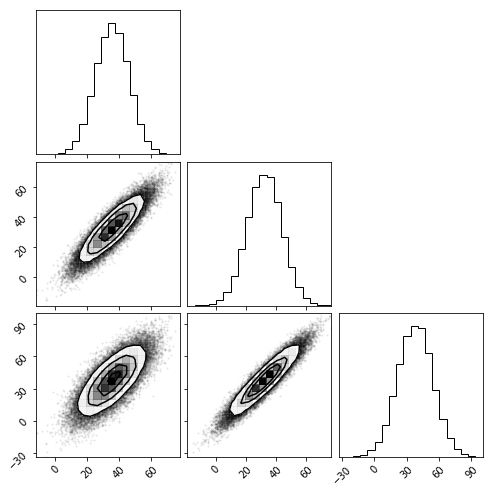

In [24]:
nsamp = 50000
#..
samples = np.random.multivariate_normal(mean_all,cov_all,nsamp)
#..
fig,axes = corner.corner(samples)
#..

In [31]:
samples.shape

(50000, 3)

In [34]:
h_M0M3_all,xe,ye = np.histogram2d(samples[:,0],samples[:,1],bins=mbine)
h_M0M6_all,xe,ye = np.histogram2d(samples[:,0],samples[:,2],bins=mbine)
h_M3M6_all,xe,ye = np.histogram2d(samples[:,1],samples[:,2],bins=mbine)
#..

/home/mvanlier/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
/home/mvanlier/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10
/home/mvanlier/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


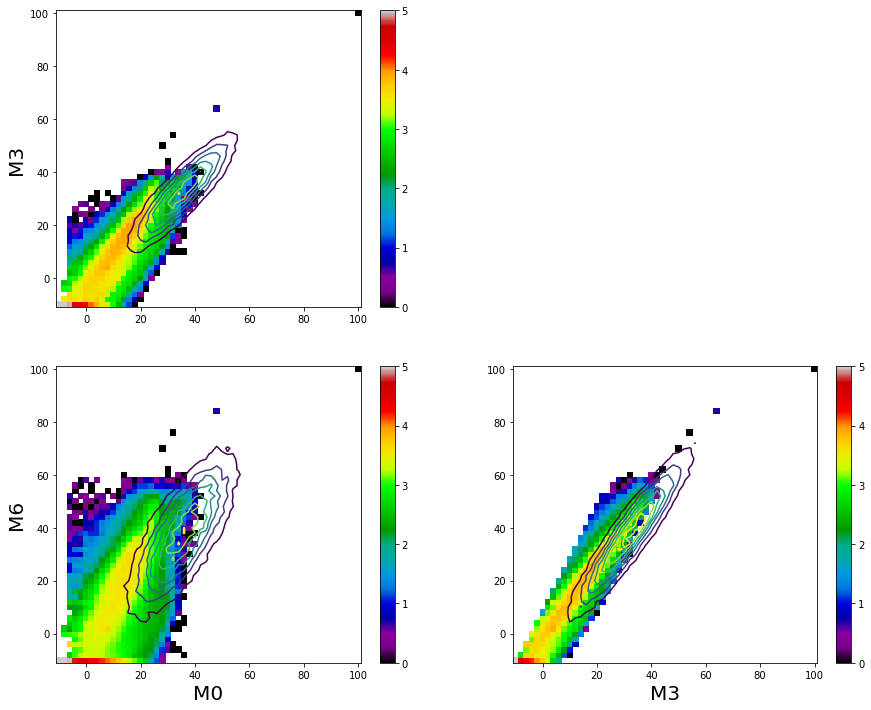

In [37]:
fig = plt.figure(figsize=(15,12))
ax=fig.add_subplot(221)
pc=plt.pcolormesh(mbine,mbine,np.log10(h_M0_M3),vmin=0,vmax=5,cmap=cm.nipy_spectral)
plt.contour(mbins,mbins,h_M0M3_all.T)
ax.set_ylabel('M3',fontsize=20)
plt.colorbar(pc)
ax=fig.add_subplot(223)
pc=plt.pcolormesh(mbine,mbine,np.log10(h_M0_M6),vmin=0,vmax=5,cmap=cm.nipy_spectral)
plt.contour(mbins,mbins,h_M0M6_all.T)
ax.set_xlabel('M0',fontsize=20)
ax.set_ylabel('M6',fontsize=20)
plt.colorbar(pc)
ax=fig.add_subplot(224)
pc=plt.pcolormesh(mbine,mbine,np.log10(h_M3_M6),vmin=0,vmax=5,cmap=cm.nipy_spectral)
plt.contour(mbins,mbins,h_M3M6_all.T)
ax.set_xlabel('M3',fontsize=20)
plt.colorbar(pc)

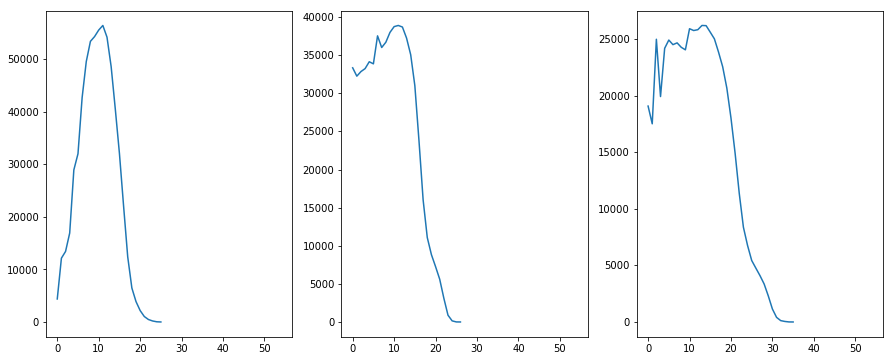

In [21]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(131)
plt.plot(h_M0_M3[1:,1:].sum(axis=0))
#....
ax = fig.add_subplot(132)
plt.plot(h_M0_M3[1:,1:].sum(axis=1))
#....
ax = fig.add_subplot(133)
plt.plot(h_M0_M6[1:,1:].sum(axis=1))
#....